<a href="https://colab.research.google.com/github/BehrozKhawar-23005633/MultiClass-Lung-Disease-Detection/blob/main/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Verify dataset location**

In [3]:
!ls "/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset"

 COVID		       Lung_Opacity.metadata.xlsx   README.md.txt
 COVID.metadata.xlsx   Normal			   'Viral Pneumonia'
 Lung_Opacity	       Normal.metadata.xlsx	   'Viral Pneumonia.metadata.xlsx'


# **Count Images in Each Class**
Let's verify the number of images in each category (COVID, Viral Pneumonia, Normal, Lung_Opacity) to check for imbalanced data.

In [7]:
# Define dataset path
dataset_path = "/content/drive/MyDrive/Colab Notebooks/COVID-19_Radiography_Dataset"

# Count images in each category (inside 'images' subfolder)
categories = ["COVID", "Viral Pneumonia", "Normal", "Lung_Opacity"]
for category in categories:
    image_folder = os.path.join(dataset_path, category, "images")  # Access 'images' subfolder
    if os.path.exists(image_folder):  # Ensure the folder exists
        num_images = len(os.listdir(image_folder))
        print(f"Category: {category}, Image Count: {num_images}")
    else:
        print(f"Warning: No 'images' folder found in {category}")

Category: COVID, Image Count: 3616
Category: Viral Pneumonia, Image Count: 1345
Category: Normal, Image Count: 10192
Category: Lung_Opacity, Image Count: 6012


# **Visualizing Dataset Distribution Through Bar Plot**
Let's plot the class distribution to see the imbalance clearly.

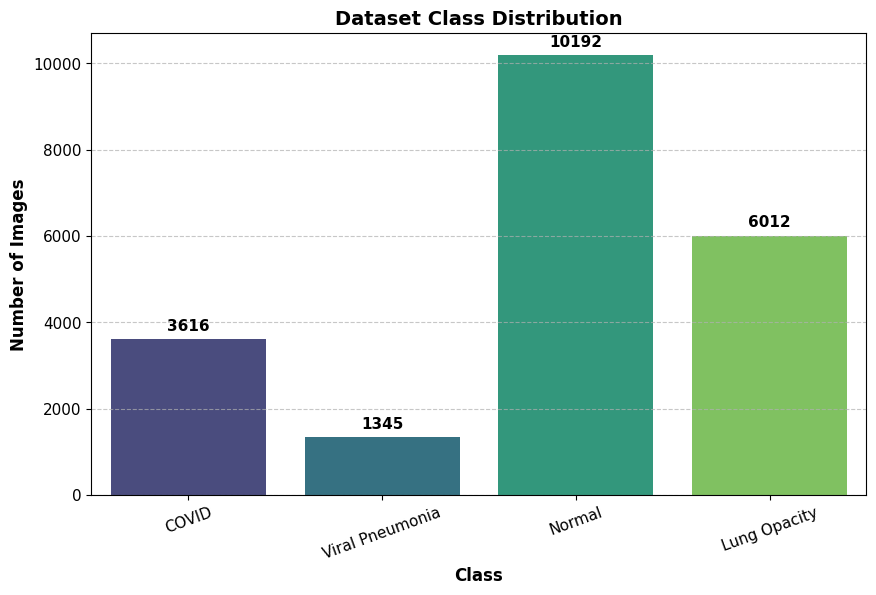

In [17]:
def plot_class_distribution(categories, image_counts, save_path="class_distribution.png"):
    """
    Plots and saves the dataset class distribution bar chart.
    """
    plt.figure(figsize=(10, 6))

    sns.barplot(x=categories, y=image_counts, hue=categories, palette="viridis", legend=False)

    # Enhancing visualization
    plt.xlabel("Class", fontsize=12, fontweight='bold')
    plt.ylabel("Number of Images", fontsize=12, fontweight='bold')
    plt.title("Dataset Class Distribution", fontsize=14, fontweight='bold')
    plt.xticks(rotation=20, fontsize=11)
    plt.yticks(fontsize=11)

    # Display exact count values on top of bars
    for index, value in enumerate(image_counts):
        plt.text(index, value + 200, str(value), ha='center', fontsize=11, fontweight='bold')

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Save and show the plot
    plt.savefig(save_path, bbox_inches="tight", dpi=300)
    plt.show()

# Data
categories = ["COVID", "Viral Pneumonia", "Normal", "Lung Opacity"]
image_counts = [3616, 1345, 10192, 6012]

# Generate and save plot
plot_class_distribution(categories, image_counts)